# Binary classification using 2 scikit learn models & neural network

In [ ]:
#Import bibliotek
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import os
import re
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import AutoMinorLocator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, roc_curve, roc_auc_score

In [ ]:
#Reading the data
for dirname, _, filenames in os.walk('/content/drive/MyDrive/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
d = pd.read_csv('/../Star_dataset/Star39552_balanced.csv')
pd.set_option('display.max_columns', 7)

/content/drive/MyDrive/data/test.csv
/content/drive/MyDrive/data/sample_submission.csv
/content/drive/MyDrive/data/train.csv
/content/drive/MyDrive/data/star_classification.csv
/content/drive/MyDrive/data/Star_dataset/Star9999_raw.csv
/content/drive/MyDrive/data/Star_dataset/Star3642_balanced.csv
/content/drive/MyDrive/data/Star_dataset/Star99999_raw.csv
/content/drive/MyDrive/data/Star_dataset/Star39552_balanced.csv


In [ ]:
d.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


## Data Preprocessing



In [ ]:
d.tail()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
39547,5.83,0.17,0.52,0.474,B7Iab,6.982245,0
39548,7.05,18.12,0.92,0.424,F5V,18.340790,1
39549,9.21,3.89,1.46,0.227,A1IV,17.159748,1
39550,9.01,2.13,1.46,1.467,M5III,15.651898,0
39551,9.12,3.82,0.79,0.480,F5V,17.030317,1


In [ ]:
d.columns

Index(['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag', 'TargetClass'], dtype='object')

In [ ]:
d.dtypes

Vmag           float64
Plx            float64
e_Plx          float64
B-V            float64
SpType          object
Amag           float64
TargetClass      int64
dtype: object

In [ ]:
d.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,16.050687,0.500000
std,1.308857,12.446291,0.788133,0.513987,2.443937,0.500006
min,-0.620000,-27.840000,0.420000,-0.400000,-0.350000,0.000000
25%,7.210000,2.430000,0.800000,0.358000,14.756514,0.000000
50%,8.160000,4.440000,0.990000,0.703000,16.020827,0.500000
75%,8.830000,8.232500,1.230000,1.129000,17.590542,1.000000
max,12.850000,772.330000,40.630000,3.440000,30.449015,1.000000


## Categorical variables Treatment

In [ ]:
d["SpType"].value_counts()

K0III         2841
K1III         1742
K2III         1479
G8III         1474
K3III         1097
              ... 
K3II+...         1
B2/B3V:nn        1
WC8 + O9I        1
F0/F2V+...       1
M3/M4III:        1
Name: SpType, Length: 2576, dtype: int64

In [ ]:
d.drop(["SpType"], axis = 1, inplace = True)

In [ ]:
d.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,10.00,31.66,6.19,1.213,22.502556,1
1,8.26,3.21,1.00,1.130,15.792525,0
2,8.27,12.75,1.06,0.596,18.797552,1
3,6.54,5.23,0.76,1.189,15.132508,0
4,8.52,0.96,0.72,0.173,13.431356,1


## Missing Values Treatment

In [ ]:
mis_val_per = 100*(d.isnull().sum()/len(d["B-V"]))
print(mis_val_per)

Vmag           0.0
Plx            0.0
e_Plx          0.0
B-V            0.0
Amag           0.0
TargetClass    0.0
dtype: float64


In [ ]:
#no missing values in dataset

Correlation  


Absolute magnitude x color index B-V


In [ ]:
d = d.loc[:,["Vmag", "Plx", "B-V", "TargetClass"]][d.loc[:,["Vmag", "Plx", "B-V", "TargetClass"]]["Plx"]>0]

In [ ]:
B_V = np.array(d["B-V"], dtype=float)
V_mag = np.array(d["Vmag"], dtype=float)
Plx = np.array(d["Plx"], dtype=float)

In [ ]:
dispc = (1000/Plx) # Plx (mas)
Absmag = V_mag-5*np.log10(dispc/10) # Absolute magnitude
d["Absmag"] = Absmag

In [ ]:
d.head()

,Vmag,Plx,B-V,TargetClass,Absmag
0,10.00,31.66,1.213,1,7.502555
1,8.26,3.21,1.130,0,0.792525
2,8.27,12.75,0.596,1,3.797551
3,6.54,5.23,1.189,0,0.132508
4,8.52,0.96,0.173,1,-1.568644


##Histograms & Heatmaps

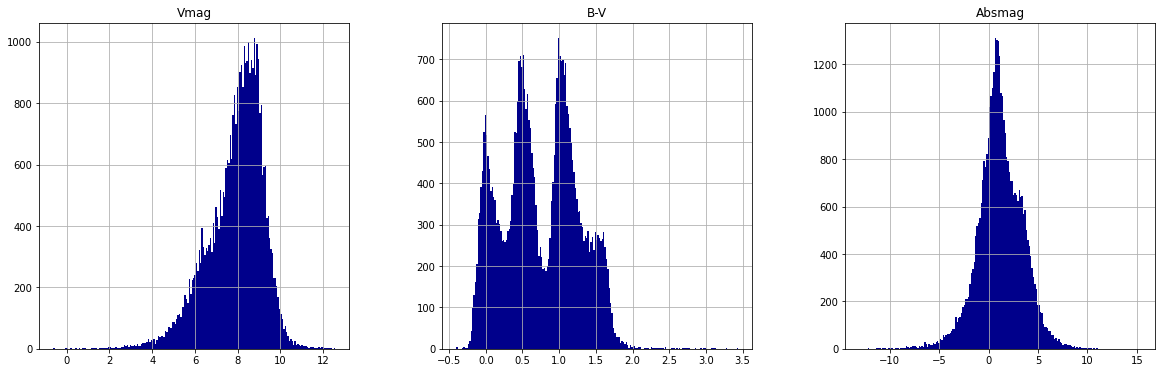

In [ ]:
d[["Vmag", "B-V", "Absmag"]].hist(figsize = (20,6), color = "darkblue", bins =  200, layout = (1,3))
plt.show()

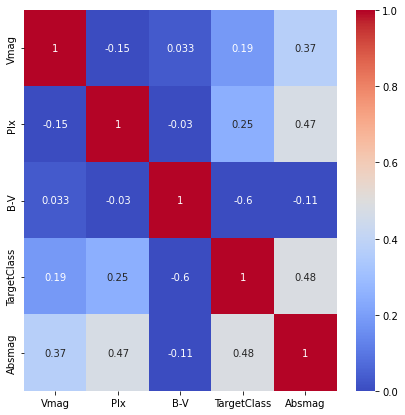

In [ ]:
plt.figure(figsize = (7,7))
sbn.heatmap(d.corr(), annot = True, vmin = 0, cmap = "coolwarm")
plt.show()

In [ ]:
d["TargetClass"].value_counts()

1    19502
0    18927
Name: TargetClass, dtype: int64

Data split

In [ ]:
Norm = MinMaxScaler()
x = d.drop(["TargetClass"], axis = 1)
x = Norm.fit_transform(x)
y = d["TargetClass"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

## Models with scikit-learn

KNN

In [ ]:
%%time
modelKNN = KNeighborsClassifier()
#fine-tuning KNN
param_grid = {"n_neighbors": [11, 12, 13, 14, 15, 16, 17, 18], "metric": ["minkowski", "chebyshev"]}
GridKNN = GridSearchCV(estimator = modelKNN, param_grid = param_grid, cv = 5)
GridKNN.fit(x_train, y_train)
print(GridKNN.best_score_)
print(GridKNN.best_estimator_.n_neighbors)
print(GridKNN.best_estimator_.metric)

0.884721189591078
17
minkowski
CPU times: user 16 s, sys: 410 ms, total: 16.4 s
Wall time: 16 s


In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors = 17, metric = "minkowski")

modelKNN.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred = modelKNN.predict(x_test)

In [ ]:
#Confusion Matrix

matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[4907  808]
 [ 550 5264]]


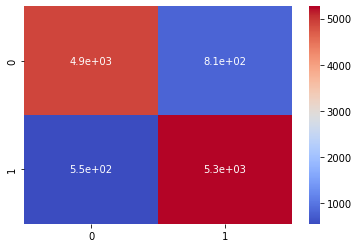

In [ ]:
sbn.heatmap(matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Roc auc: {roc_auc_score(y_test, y_pred)}")

Accuracy: 0.8822100789313904
Recall: 0.9054007567939456
Precision: 0.8669301712779973
Roc auc: 0.8820092147924234


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

Random Forest

In [ ]:
#RandomForestClassifier
%%time
ran_for=RandomForestClassifier()
param_grid = { 
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [4, 5, 6, 7]
}
gridRFC = GridSearchCV(estimator=ran_for, param_grid=param_grid)
gridRFC.fit(x_train, y_train) 

best_parameters = gridRFC.best_params_
print(best_parameters)

{'max_depth': 6, 'n_estimators': 500}
CPU times: user 6min 9s, sys: 617 ms, total: 6min 10s
Wall time: 6min 11s


In [ ]:
ran_for=RandomForestClassifier(n_estimators = 500, max_depth = 6)
ran_for.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=500)

In [ ]:
y_pred = ran_for.predict(x_test)

In [ ]:
#Confusion Matrix
matrix1 = confusion_matrix(y_test, y_pred)
print(matrix1)

[[4923  792]
 [ 519 5295]]


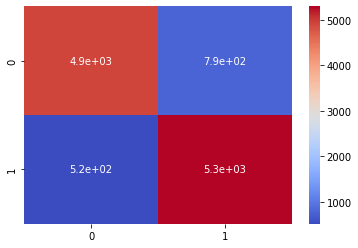

In [ ]:
sbn.heatmap(matrix1, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Roc auc: {roc_auc_score(y_test, y_pred)}")

Accuracy: 0.8862867551392142
Recall: 0.9107327141382869
Precision: 0.869886643666831
Roc auc: 0.8860750184864663


## Artificial Neural Network

In [ ]:


import tensorflow as tf

modelNN = tf.keras.models.Sequential()

In [ ]:
modelNN.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
modelNN.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))
modelNN.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
modelNN.compile(optimizer='adam', loss='binary_crossentropy', metrics= ['accuracy'])


In [ ]:
history = modelNN.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
841/841 [==============================] - 2s 2ms/step - loss: 0.3845 - accuracy: 0.8657
Epoch 2/100
841/841 [==============================] - 2s 2ms/step - loss: 0.3135 - accuracy: 0.8835
Epoch 3/100
841/841 [==============================] - 2s 2ms/step - loss: 0.3103 - accuracy: 0.8831
Epoch 4/100
841/841 [==============================] - 2s 2ms/step - loss: 0.3102 - accuracy: 0.8826
Epoch 5/100
841/841 [==============================] - 2s 2ms/step - loss: 0.3089 - accuracy: 0.8828
Epoch 6/100
841/841 [==============================] - 2s 2ms/step - loss: 0.3091 - accuracy: 0.8831
Epoch 7/100
841/841 [==============================] - 2s 2ms/step - loss: 0.3083 - accuracy: 0.8827
Epoch 8/100
841/841 [==============================] - 2s 2ms/step - loss: 0.3083 - accuracy: 0.8843
Epoch 9/100
841/841 [==============================] - 2s 2ms/step - loss: 0.3081 - accuracy: 0.8842
Epoch 10/100
841/841 [==============================] - 2s 2ms/step - loss: 0.3078 - accura

In [ ]:
y_pred = modelNN.predict(x_test)
y_pred

array([[0.05443794],
       [0.00588447],
       [0.96153104],
       ...,
       [0.9694822 ],
       [0.07590699],
       [0.05061474]], dtype=float32)

In [ ]:
def validateModel(x, y, cls):
  y_pred = cls.predict(x)
  acc = accuracy_score(y, tf.round(y_pred))  
  roc = roc_auc_score(y, y_pred)

  return (acc, roc)

In [ ]:
validateModel(x_test, y_test, modelNN)

(0.8849856882643767, 0.9435444537441074)

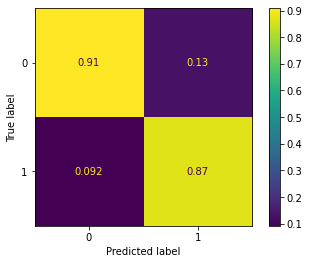

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = modelNN.predict(x)

ConfusionMatrixDisplay.from_predictions(y, tf.round(y_pred), normalize='pred')
plt.show()